HEART FAILURE RISK PREDICTION PROJECT POC# This script pulls in datasets for patients with Heart Disease from the Cleveland Clinic Foundation, USA collected over time. Objective is on the use of clustering algorithms to group patients into similar groups on basis of their characteristics. 2 different clustering algorithms are used (kmeans and Hierarchical clustering methods. The goal is to support clinicians in provision of more targeted treatments to patients with similar characteristics - who are likely to respond in similar ways to different treatment options.

# Author = 'Dr Adaeze Nwobodo' email = 'AdaezeNwobodo@gmail.com'

# Import library packages {Dplyr, rpart, sigr, ggplot, tidyselect, base, readr, readxl, renv, tibble, tidyr, utils}

In [ ]:
R.home()

In [1]:
#LOAD HELPER FUNCTIONS
# 1
load_file <- function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}

print(load_file)

<srcref: file "" chars 3:14 to 6:1>


In [4]:

# 2
clean_data_nofullduplicates <- function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return(distinct(data_frame, keep_all = TRUE))
}

print(clean_data_nofullduplicates)

<srcref: file "" chars 3:32 to 6:1>


In [5]:
# 3
clean_datanopartialduplicates <- function(data_frame) {
    #removes partial duplicates
    return(data_frame %>%
          count(Date) %>%
          filter(n > 1))
}

print(clean_datanopartialduplicates)

function(data_frame) {
    #removes partial duplicates
    return(data_frame %>%
          count(Date) %>%
          filter(n > 1))
}


In [6]:
# 4 
get_levels <- function(data_frame) {
    #checks for levels within dataset
    return(levels(dataframe))
}

print(get_levels)

function(data_frame) {
    #checks for levels within dataset
    return(levels(dataframe))
}


In [7]:
# 5
first_quartile <- function(data_frame) {
    return(quantile(data_frame, 0.25))
}

print(first_quartile)

function(data_frame) {
    return(quantile(data_frame, 0.25))
}


In [8]:
# 6
third_quartile <- function(data_frame) {
    return(quantile(data_frame, 0.75))
}

print(third_quartile)

function(data_frame) {
    return(quantile(data_frame, 0.75))
}


In [9]:
# 7
get_wday_month <- function(data_frame) {
    #obtain separate weekday and month datasets from "Date" column for use as independent variables 
    return(data_frame %>%
          mutate(wday = wday(Date, label = TRUE), month = month(Date, label = TRUE)))
}

print(get_wday_month)

function(data_frame) {
    #obtain separate weekday and month datasets from "Date" column for use as independent variables 
    return(data_frame %>%
          mutate(wday = wday(Date, label = TRUE), month = month(Date, label = TRUE)))
}


In [10]:
# 8
calculate_test_train_split <- function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
           round(N * 0.75) %>%
           gp <- runif(N)) %>%
           train_df <- data_frame[gp < 0.75, ]
           test_df <- data_frame[gp >= 0.75, ]

}

print(calculate_test_train_split)

function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
           round(N * 0.75) %>%
           gp <- runif(N)) %>%
           train_df <- data_frame[gp < 0.75, ]
           test_df <- data_frame[gp >= 0.75, ]

}


In [2]:
# IMPORT LIBRARIES

In [3]:
#Import Libraries
library(dplyr)
library(ggplot2)
library(tidyr)
install.packages("caret"); library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
install.packages("sigr"); library(sigr)
library(tidyverse)
library(tidyselect)
library(tidymodels)
library(utils)
library(base)
library(broom)
library(cluster)
library(ellipsis)
library(graphics)
library(grDevices)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
install.packages("ranger"); library(ranger)
library(tibble)
install.packages("xgboost"); library(xgboost)
library(randomForest)
library(magrittr)
install.packages("Metrics"); library(Metrics)
install.packages("assertive"); library(assertive)
library(lubridate)
install.packages("xts"); library(xts)
install.packages("hms"); library(hms)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
      binary source needs_compilation
caret 6.0-91  7.0-1              TRUE



installing the source package ‘caret’


Loading required package: lattice


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘purrr’


The following object is masked from ‘package:caret’:

    lift


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-33. For overview type 'help("mgcv-package")'.

Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
     binary source needs_compilation
sigr  1.1.4  1.1.5             FALSE



installing the source package ‘sigr’




ERROR: Error: package or namespace load failed for ‘tidyverse’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘dbplyr’


In [4]:
install.packages("vtreat"); library(vtreat)
install.packages("chron"); library(chron)
install.packages("data.table"); library(data.table)
install.packages("binr"); library(binr)
install.packages("psych"); library(psych)
install.packages("ggfortify"); library(ggfortify)
install.packages("tibble"); library(tibble)
library(mlbench)
install.packages("tidymodels"); library(tidymodels)
library(rpart) 
library(parsnip)
install.packages("wrapr"); library(wrapr)
library(brotools)
install.packages("rsample"); library(rsample)
install.packages("e1071"); library(e1071)
install.packages("elasticnet"); library(elasticnet)
install.packages("glmnet"); library(glmnet)

Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
       binary source needs_compilation
vtreat  1.6.3  1.6.5             FALSE



installing the source package ‘vtreat’


Loading required package: wrapr


Attaching package: ‘wrapr’


The following object is masked from ‘package:mgcv’:

    %.%


The following objects are masked from ‘package:tidyr’:

    pack, unpack


The following object is masked from ‘package:dplyr’:

    coalesce


Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
      binary source needs_compilation
chron 2.3-56 2.3-62              TRUE



installing the source package ‘chron’



Attaching package: ‘chron’


The following objects are masked from ‘package:lubridate’:

    days, hours, minutes, seconds, years


Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.2 1.17.0              TRUE



installing the source package ‘data.table’



Attaching package: ‘data.table’


The following objects are masked from ‘package:wrapr’:

    :=, let


The following object is masked from ‘package:sigr’:

    let


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
     binary source needs_compilation
binr    1.1  1.1.1             FALSE



installing the source package ‘binr’


Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’





  There are binary versions available but the source versions are later:
               binary   source needs_compilation
mnormt          2.0.2    2.1.1              TRUE
GPArotation 2014.11-1 2024.3-1             FALSE
psych           2.2.3   2.4.12             FALSE



installing the source packages ‘mnormt’, ‘GPArotation’, ‘psych’


Warning message in install.packages("psych"):
“installation of package ‘mnormt’ had non-zero exit status”
Warning message in install.packages("psych"):
“installation of package ‘psych’ had non-zero exit status”


ERROR: Error in library(psych): there is no package called ‘psych’


In [5]:
#Load the CSV file into a data frame 
FramData_df <- read.csv("~/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHubRprojects/Heart Disease/Data/framingham.csv")

#View First few rows 
head (FramData_df)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


In [6]:
install.packages("lsr"); library(lsr)
install.packages("outliers"); library(outliers)

Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/zy/kbz3s57j2nq6yv9ydfw_r7g40000gn/T//Rtmp8hx8tw/downloaded_packages


Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/zy/kbz3s57j2nq6yv9ydfw_r7g40000gn/T//Rtmp8hx8tw/downloaded_packages


In [7]:
install.packages("remotes")

Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
remotes  2.4.2  2.5.0             FALSE



installing the source package ‘remotes’




In [8]:
install.packages("devtools")

Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘systemfonts’, ‘textshaping’, ‘gert’, ‘ragg’, ‘usethis’, ‘pkgdown’, ‘rversions’





  There are binary versions available but the source versions are later:
            binary source needs_compilation
systemfonts  1.0.4  1.2.1              TRUE
textshaping  0.3.6  1.0.0              TRUE
gert         1.6.0  2.1.4              TRUE
ragg         1.2.2  1.3.3              TRUE
usethis      2.1.5  3.1.0             FALSE
pkgdown      2.0.2  2.1.1             FALSE
rversions    2.1.1  2.1.2             FALSE
devtools     2.4.3  2.4.5             FALSE



installing the source packages ‘systemfonts’, ‘textshaping’, ‘gert’, ‘ragg’, ‘usethis’, ‘pkgdown’, ‘rversions’, ‘devtools’


Warning message in install.packages("devtools"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘gert’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘usethis’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”


In [9]:
head(FramData_df)
nrow(FramData_df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


[1] 4240

In [10]:
#Checking data for any missing or null values 

sum(is.na(FramData_df)) #overall missing values
colSums(is.na(FramData_df)) #missing values per column

[1] 645

male             age       education   currentSmoker      cigsPerDay 
              0               0             105               0              29 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
             53               0               0               0              50 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0              19               1             388 
     TenYearCHD 
              0

In [11]:
#High level summary of numerical features of FramData dataset

summary(FramData_df)

      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.979   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
                                  NA's   :105                     
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.006   Mean   :0.02962   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.0000

Summary breakdown - some features listed above are BINARY eg - "Sex", "currentSmoker - whether or not the patient smokes", "prevalentHyp - which implies whether or not the patient has hypertension", "BP meds - which would naturally folllow a diagnosis of hypertension however its mean value is quite different to the "prevalentHyp" column likely because of some missing datasets in "BPMeds" column, "prevalentStroke" which implies the presence or absence of a stroke in each patient. Same for "Diabetes" column which implies its presence or absence in each patient and "TenYearCHD"
The "Age" Column suggests the youngest person in the group was 32 years and the oldest was 70 years
For "Education" column, a 4 tiered categorization system has been used to rank patients into each category
For "cigsPerDay", the number of cigarettes smoked per day ranged from 0(none) to 70 cigarettes
For "totChol" values ranged from 107g/dL at a minimun to 696g/dL at a maximum (unclear what the LDL/HDL ratio is per patient). There were 50 datapoints missing from this column
For "sysBP" column, values ranged from a minimum of 83.5mmHg (which is quite low) and through to a maximum recorded value of "295mmHg" (which is extremely high and the patient would be deemed at imminent risk of a stroke)
For "DiaBP" column, values ranged from a minimum of 48 (again quite low) through to 142.5mmHg (also quite high)
For "BMI" column, values ranged from a minimum of 15.54 (at which the patient would be considered to be severely anorexic) through to a maximum value of 56.80 (which would be considered mobidly obese for the patient)
For "heart rate" column, values ranged from a minimum of 44 (which would be considered bradycardic/low for a patient unless it was the norm for the patient) through to a maximum of 143 (which would be considered tachycardic/high and would require medical assessment and likely intervention)
For "glucose" column, the values ranged from a minimum of 40 through to a maximum of 394



In [12]:
#Check data types 
str(FramData_df)

'data.frame':	4240 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


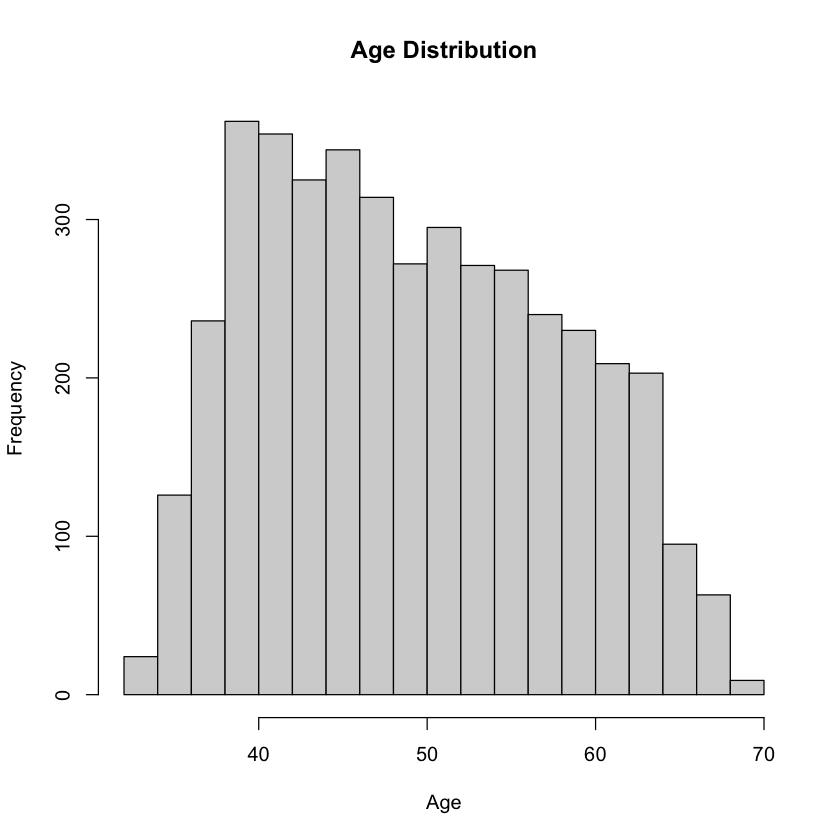

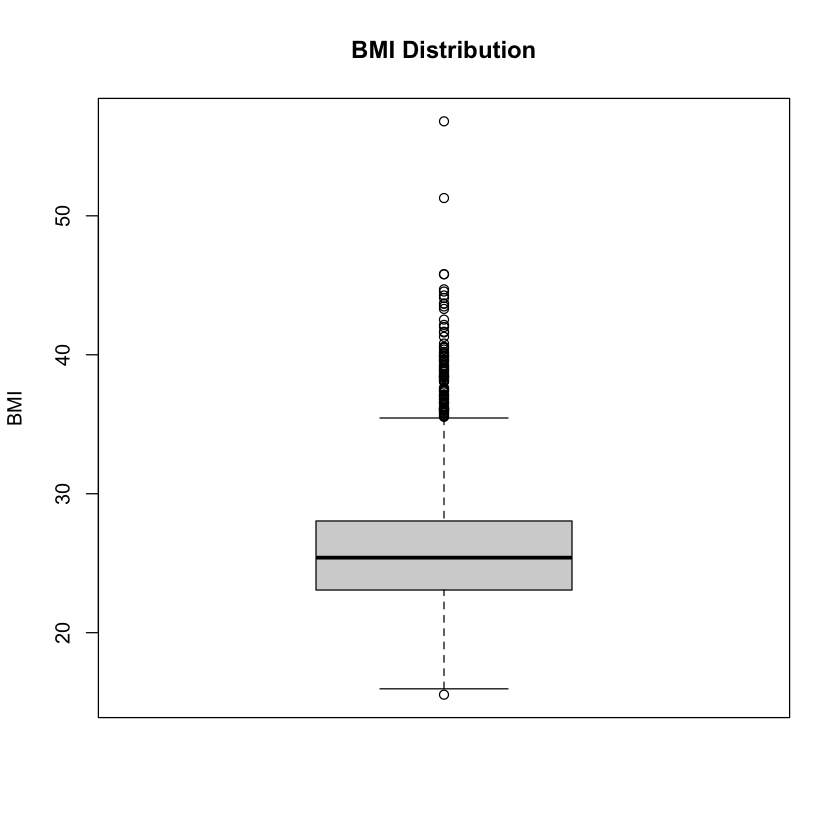

In [13]:
#Univariate analysis - distribution of key features 
#Numerical features 

hist(FramData_df$age, main = "Age Distribution", xlab = "Age")
boxplot(FramData_df$BMI, main = "BMI Distribution", ylab = "BMI")


The graphs above show that the vast majority of patients in the heart disease dataset are aged between 40 and 70 years. With fewer patients in the 70 age bracket. Surprising as incidence of heart disease is known to increase with advancing age.

The boxplot of BMI values suggests a normal, symmetric distribution of the datapoints with the median at the centre of the box (at approx 25) and with both whiskers of approximately equal length. 
Dots above the whiskers indicate outliers >BMI of 35 (potential data entry errors, although some likely due to natural extreme values as well). Single outlier datapoint below the BMI of 15 indicating a patient who likely had/has anorexia

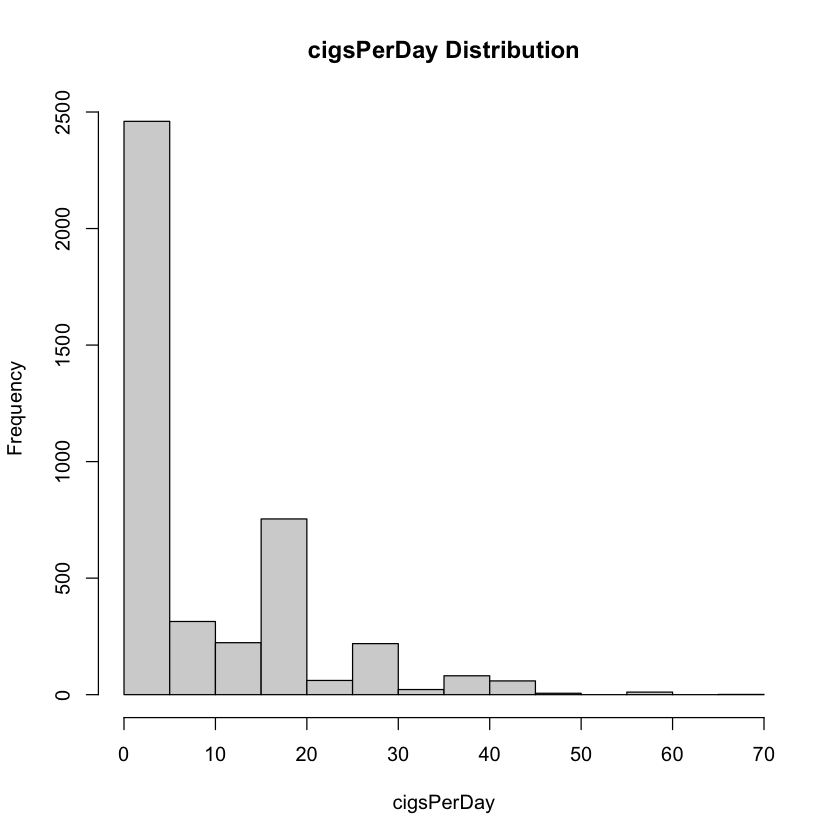

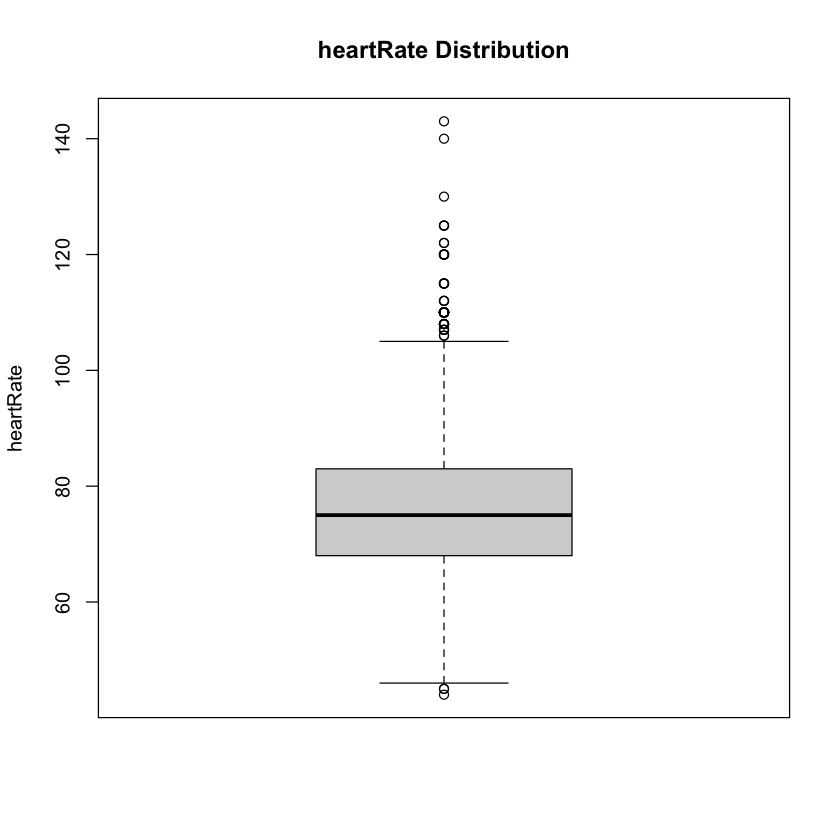

In [14]:
#Univariate analysis - distribution of key features 
#Numerical features 

hist(FramData_df$cigsPerDay, main = "cigsPerDay Distribution", xlab = "cigsPerDay")
boxplot(FramData_df$heartRate, main = "heartRate Distribution", ylab = "heartRate")


Graphs above show that the vast majority of patients don't smoke at all. The next highest frequency of patients is the group that smokes between 15 - 20 cigarettes/day. The range for most patients in this dataset being between 0 - 20 cigarettes/day.

The boxplot of heart rate distribution again appears to show a normal symmetrical distribution to the datapoints, with the median at the centre of the box (at approx 75bpm) and both whiskers of approximately equal length (to encompass heart rate values of approximately 45 bpm through to a max of approx 105bpm. Outliers of 105 - 145 (& below 45)likely due to natural extreme values or data entry point errors.

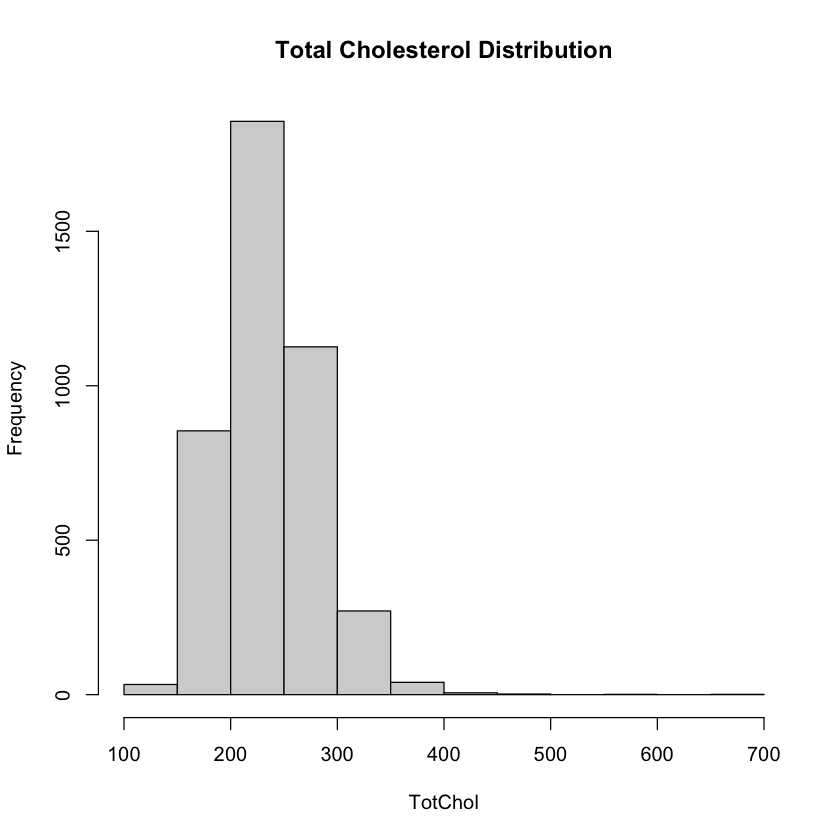

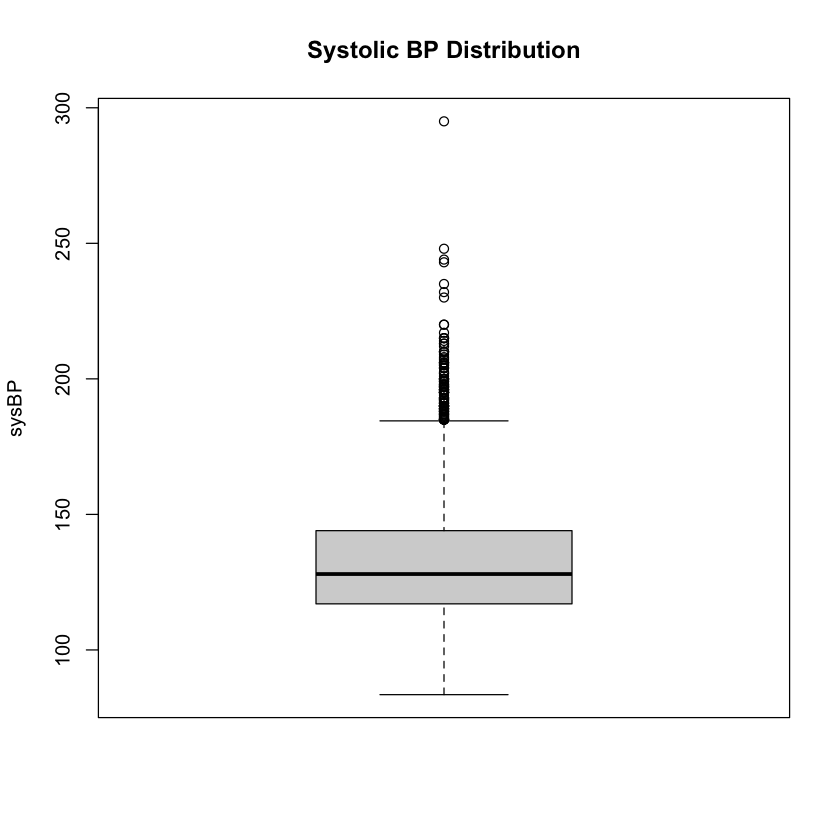

In [15]:
#Univariate analysis - distribution of key features 
#Numerical features 

hist(FramData_df$totChol, main = "Total Cholesterol Distribution", xlab = "TotChol")
boxplot(FramData_df$sysBP, main = "Systolic BP Distribution", ylab = "sysBP")

From the graphs above, the vast majority of patients had cholesterol levels between 150 - 300mg/dL

The boxplot of the systolic BP distribution shows a slight right-sided (positive) skew, with a median systolic BP of approximately 130mmHg. This suggests more patients with high systolic BP values (with a slightly longer right tail)
All the outliers here are present above the right tail value of 190mmHg. Again, conceivable that some of these outliers will be due to natural human extremes while the rest due to data point errors.

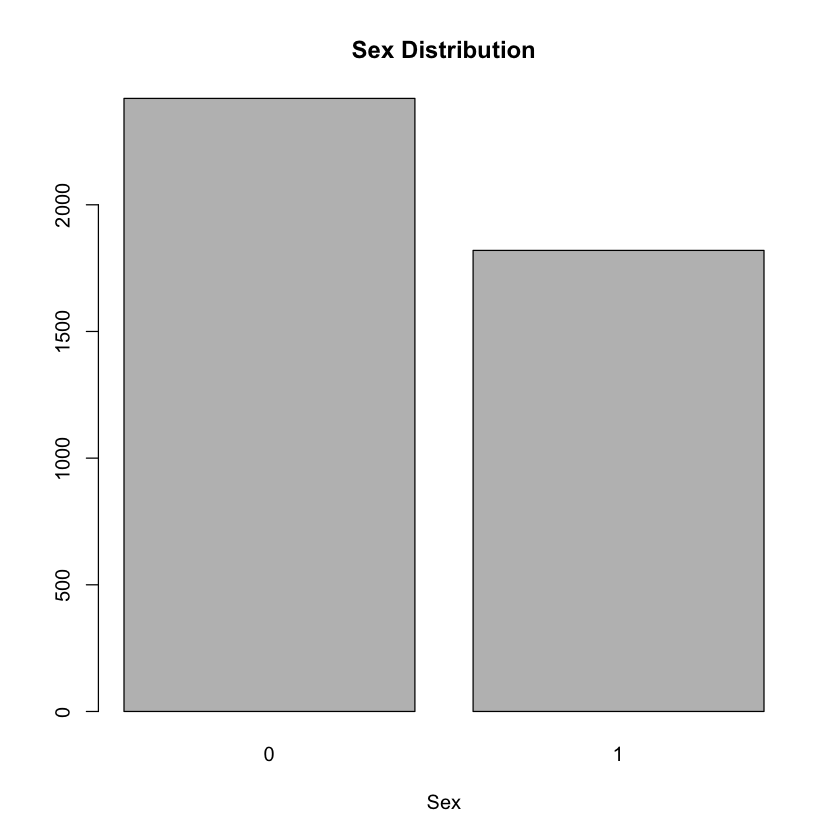

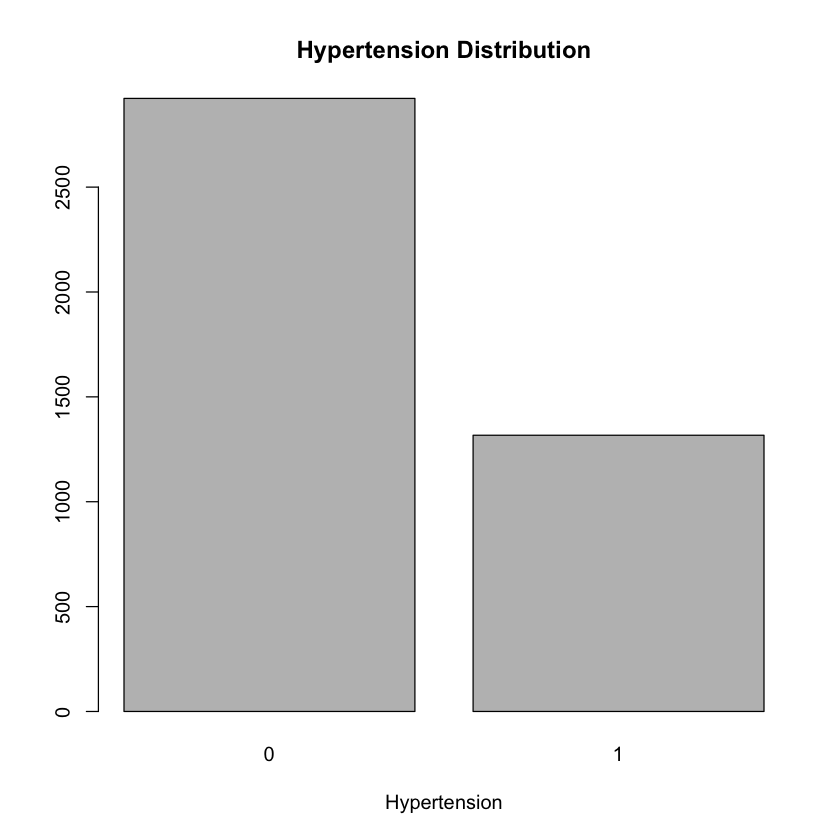

In [16]:
#Univariate analysis - distribution of key features 
#Categorical features 

barplot(table(FramData_df$male), main = "Sex Distribution", xlab = "Sex")
barplot(table(FramData_df$prevalentHyp), main = "Hypertension Distribution", xlab = "Hypertension")
        

In the sex distribution bar chart above, the male sex is represented as a 1 which implies there are more female (0) datapoints than there are from males. 



In the Hypertension distribution chart above, the results show there are twice as many non-hypertensive patients in the dataset as hypertensive patients. 




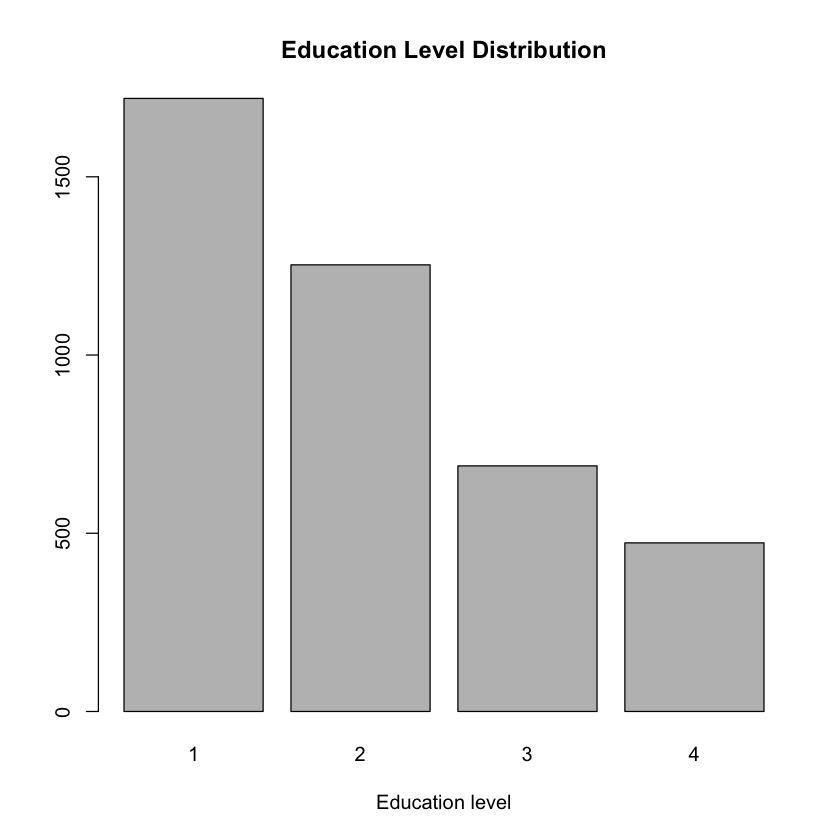

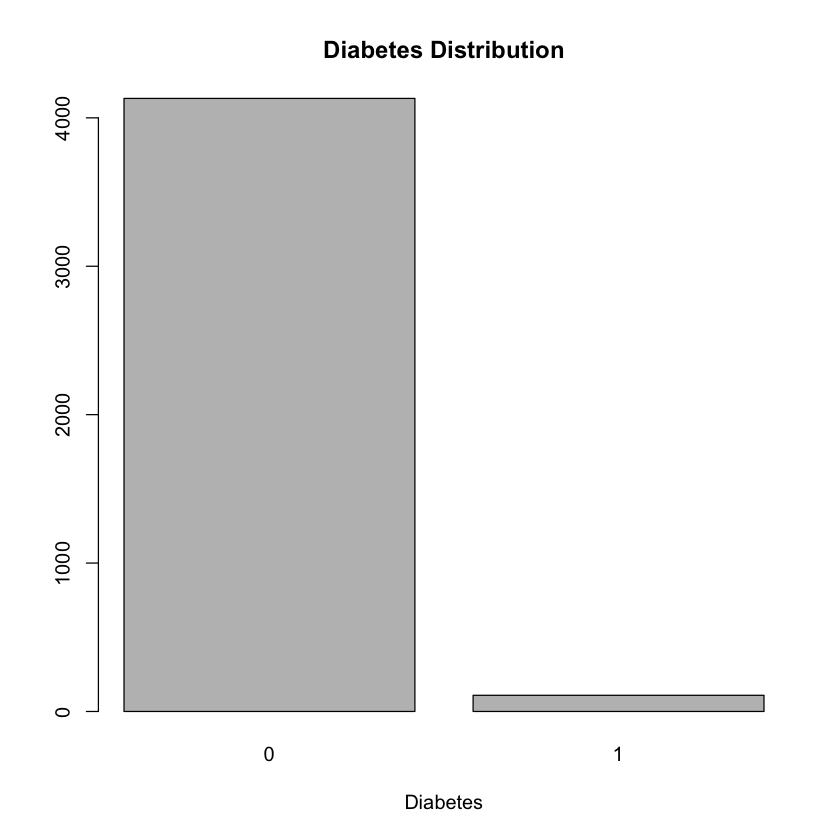

In [17]:
#Univariate analysis - distribution of key features 
#Categorical features

barplot(table(FramData_df$education), main = "Education Level Distribution", xlab = "Education level")
barplot(table(FramData_df$diabetes), main = "Diabetes Distribution", xlab = "Diabetes")


The Education level bar chart shows the number of patients per category decreasing as the education level increases. Also shows 3* as many patient datapoints in Education category level 1 as present in category level 4.

,age,sysBP,BMI,totChol,heartRate
age,1.0000000,0.3940533,NA,NA,NA
sysBP,0.3940533,1.0000000,NA,NA,NA
BMI,NA,NA,1,NA,NA
totChol,NA,NA,NA,1,NA
heartRate,NA,NA,NA,NA,1


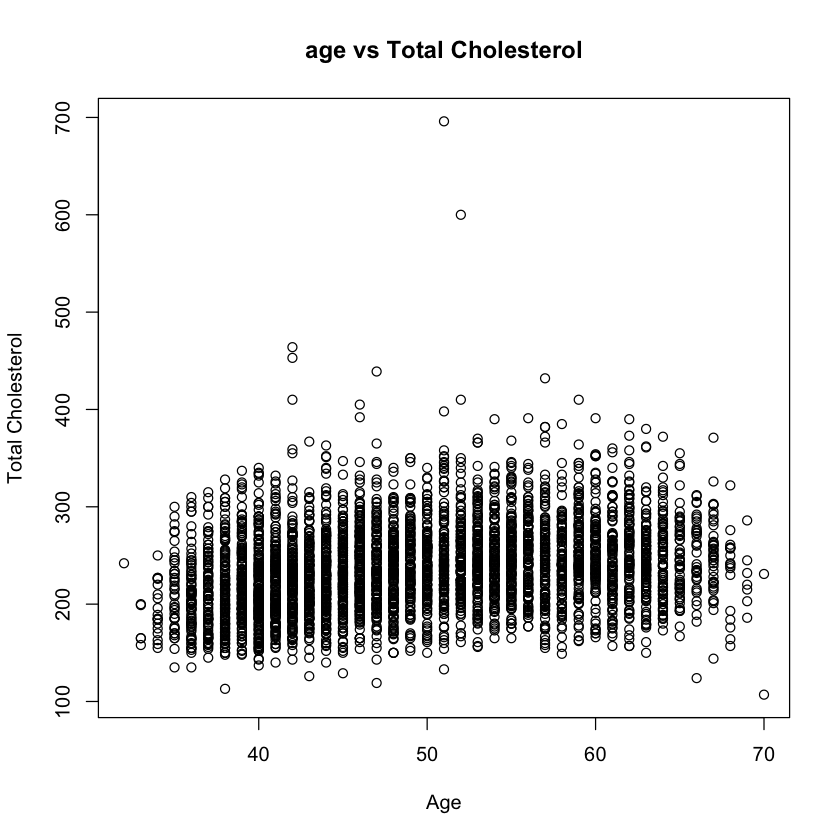

In [18]:
#Bivariate analysis - relationships between numerical variables 

cor(FramData_df[, c("age", "sysBP", "BMI", "totChol", "heartRate")])
plot(FramData_df$age, FramData_df$totChol, main = "age vs Total Cholesterol", xlab = "Age", ylab = "Total Cholesterol")


Although the graph does suggest a slight upward trend in total cholesterol levels with advancing age, this doesn't appear statistically significant (to the visual eye)

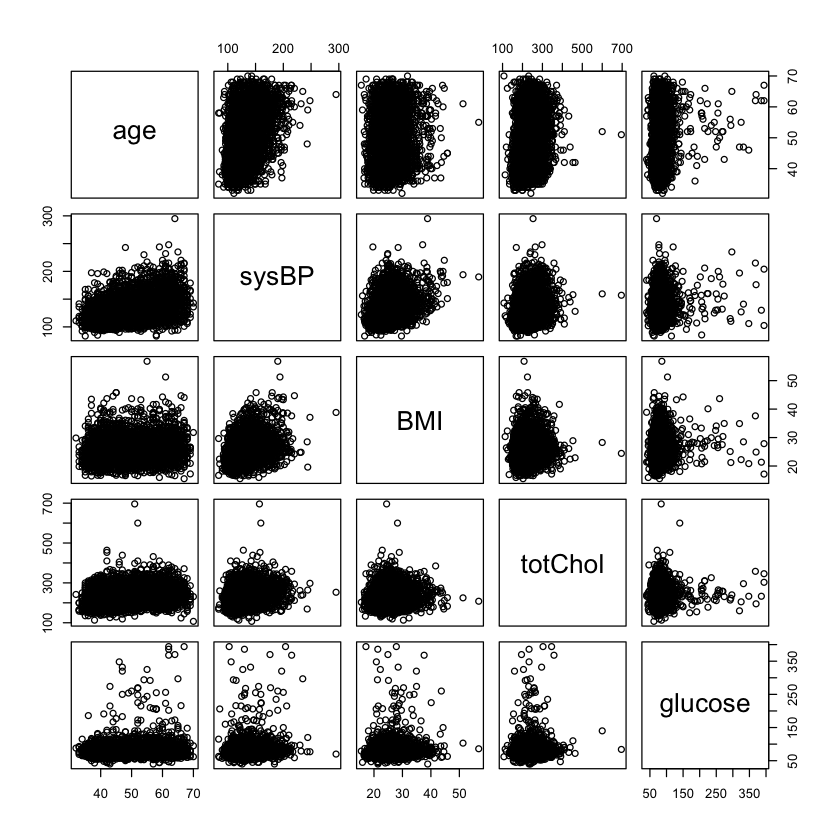

In [19]:
#Multivariate Analysis - exploration of interactions between multiple variables 

pairs(FramData_df[, c("age", "sysBP", "BMI", "totChol", "glucose")])
      

In [20]:
#Feature Importance - importance of the 15 variables in the dataset in predicting Framingham study 
#outcome 

glm_model <- glm(TenYearCHD ~ ., data = FramData_df)

# View summary statistics (p-values, coefficients)
summary(glm_model)



Call:
glm(formula = TenYearCHD ~ ., data = FramData_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.73036  -0.18925  -0.10677  -0.01153   1.08033  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.5762585  0.0789125  -7.303 3.45e-13 ***
male             0.0574246  0.0124715   4.604 4.28e-06 ***
age              0.0070575  0.0007691   9.176  < 2e-16 ***
education       -0.0056161  0.0056705  -0.990 0.322040    
currentSmoker    0.0081070  0.0181548   0.447 0.655226    
cigsPerDay       0.0021636  0.0007827   2.764 0.005733 ** 
BPMeds           0.0459077  0.0346845   1.324 0.185726    
prevalentStroke  0.1368394  0.0753542   1.816 0.069460 .  
prevalentHyp     0.0283079  0.0174492   1.622 0.104825    
diabetes         0.0258235  0.0442138   0.584 0.559217    
totChol          0.0001293  0.0001353   0.956 0.339118    
sysBP            0.0024734  0.0004960   4.987 6.42e-07 ***
diaBP           -0.0011731  0.0008166

Above, a Generalised Linear Model (GLM) was trained to predict Ten Year CHD (coronary heart disease risk) included as the outcome data, using the Framingham dataset. These are the most important conclusions: - 

STRONGLY SIGNIFICANT PREDICTORS (probability < 0.001 or ***)
1. Age (probability < 2e-16) -> older individuals are at higher risk of CHD
2. Male (probability 4.28e-6) -> men have a significantly higher risk
3. Systolic Blood Pressure (probability 6.42e-7) -> the higher the systolic blood pressure, the greater the risk of CHD
4. Glucose (probability 0.000155) -> higher glucose levels are associated with an increased CHD risk

MODERATELY SIGNIFICANT PREDICTORS (0.01 < p < 0.05 or **)
1. Cigarettes per Day (p = 0.0057) -> more cigarettes smoked per day increases CHD risk

MARGINALLY SIGNIFICANT PREDICTORS (0.05 < p < 0.1 or *)
1. Prevalent Stroke (p = 0.069) -> History of a previous stroke might contribute to an increased CHD risk

NON-SIGNIFICANT FACTORS (p > 0.1)
Education, current smoking status, BP medication, diabetes, total cholesterol (which is surprising as specific types of high cholesterol levels are known to positively correlate with an increased risk for heart disease), BMI (also surprising outcome), heart rate, diastolic BP -> none of these contributed significantly to CHD risk IN THIS MODEL.

CONCLUSION
1. Age, male sex, systolic BP levels, glucose levels are smoking were identified as the strongest risk factors
2. Previous stroke history might be important but its effect here was marginal
3. Other factors including cholesterol, BMI, diastolic BP, BP meds etc did not show a strong significance in this model but might still be relevant clinically

TO IMPROVE ON MODEL PERFORMANCE 
1. Handle missing data - as 582 datapoints were missing/deleted - imputing these missing values could potentially improve the model's performance
2. Try other more powerful models - Random Forest, XGBoost might improve on current predictions 

In [21]:
#Target Variable Analysis - checking the data for class imbalance 

table(FramData_df$TenYearCHD)



   0    1 
3596  644 

Ten Year CHD is binary, checked data for class imbalance as if heavily skewed toward one class or other (0 aka no disease or 1 for disease), can impact on model performance. The data is clearly heavily skewed towards class 0 for no disease which could ultimately affect model performance

In [22]:
#Imputation for Missing Data

summary(FramData_df)

      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.979   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
                                  NA's   :105                     
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.006   Mean   :0.02962   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.0000

Figures above show missing data for the following categories 
1. Education = 105 NA
2. Cigarettes per day = 29 NA
3. BP Meds = 53 NA
4. Total Cholesterol = 50 NA
5. BMI = 19 NA
6. Heart Rate = 1 NA
7. Glucose 388 NA

#For Missing Data Imputation of the Framingham dataset, the "median" value was used for skewed data, the "mean" value used for normal distributed data

and the "mode" was used for the categorical variables


In [23]:
#Missing Data Imputation for Education (Categorical, 105 NA)
#Mode Imputation used to fill missing datapoints with the most frequent category

FramData_df$education[is.na(FramData_df$education)] <- as.numeric(names(sort(table(FramData_df$education), decreasing = TRUE) [1]))


In [24]:
#Missing Data Imputation for Cigarettes per day (Numerical, 29 NA)
#Median Imputation used here as smoking behaviour is often skewed 

FramData_df$cigsPerDay[is.na(FramData_df$cigsPerDay)] <- median(FramData_df$cigsPerDay, na.rm = TRUE)


In [25]:
#Missing Data Imputation for BP Meds (Categorical, 53 NA)
#Mode Imputation used here to fill missing datapoints with most frequent category where "missing" here means the patient is not on BP meds

FramData_df$BPMeds[is.na(FramData_df$BPMeds)] <- 0



In [26]:
#Missing data imputation for Total Cholesterol (Numerical, 50 NA)
#Median Imputation used to fill missing datapoints 

FramData_df$totChol[is.na(FramData_df$totChol)] <- median(FramData_df$totChol, na.rm = TRUE)



In [27]:
#Missing data imputation for BMI (Numerical, 19 NA)
#Mean Imputation used to fill missing datapoints as tyipically a normal distribution is expected here 

FramData_df$BMI[is.na(FramData_df$BMI)] <- mean(FramData_df$BMI, na.rm = TRUE)

                                                  

In [28]:
#Missing data imputation for Heart Rate (Numerical, 1 NA)
#MEan Imputation was used to impute the single missing value here

FramData_df$heartRate[is.na(FramData_df$heartRate)] <- mean(FramData_df$heartRate, na.rm = TRUE)

                                                            

In [29]:
#Missing data imputation for Glucose (Numerical, 388 NA)
#Mean imputation used here

FramData_df$glucose[is.na(FramData_df$glucose)] <- mean(FramData_df$glucose, na.rm = TRUE)


In [30]:
#Printing out a summary of the dataset to confirm there are no longer any missing values

summary(FramData_df)

      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.955   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 8.944   Mean   :0.02925   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000  
    diabetes          totCh

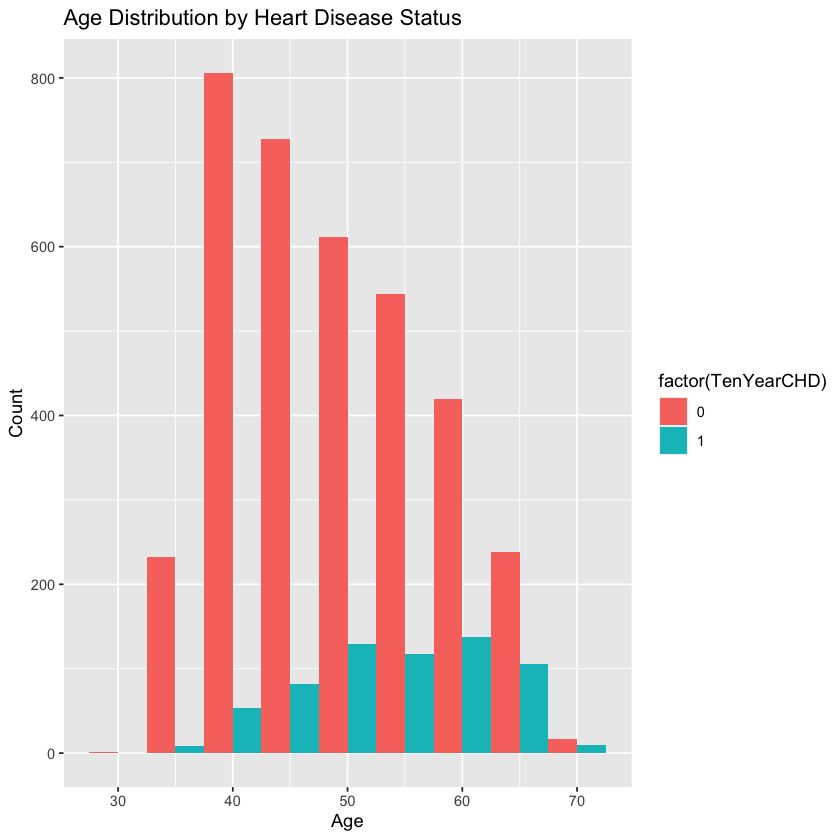

In [31]:
#Visualisation of the data
ggplot(FramData_df, aes(x = age, fill = factor(TenYearCHD))) + geom_histogram(binwidth = 5, position = "dodge") + labs(title = "Age Distribution by Heart Disease Status", x = "Age", y = "Count")


FEATURE ENGINEERING SECTION 

Target Variable provided in the dataset is ten year CHD risk which is related to Heart Failure risk but not directly. Thus for the purpose of this project, the target variable will be redefined to better match heart failure risk:- 
1. High Risk (1) - if the patient has HBP, DM, smoking history of 5 pack years and above, obesity (high BMI) + prior CVD indicators
2. Low Risk (0) - if none or veryt few risk factors are present

Creation of New Features based on medical knowledge of Heart Failure Risk
1. Hypertension Risk Score (New Feature) - I will combine systolic BP (sysBP) and diastolic BP (diaBP) into a categorical feature:
    - Normal (<120/80mmHg) -> 0
    - Prehypertensive (120-139/80-89mmHg) -> 1
    - Hypertensive (>140/90mmHg( -> 2
2. Obesity Indicator - I will convert BMI into categories:
    - Normal: BMI <25 -> 0
    - Overweight: 25 >= BMI < 30 -> 1
    - Obese: BMI >= 30 -> 2
3. Heart Stress Index feature - I will create this new feature which i arbitrarily define for the purpose of this project's objective as (0.3 * sysBP + 0.2 * heartRate + 0.3 * smoking + 0.2 * diabetes)
4. Prior Cardiovascular Disease Indicator
    - If TenYearCHD = 1, this is used as prior CVD risk, as it will increase risk of heart failure
5. Age Groups - i will convert these into risk categories:-
    - <40 years -> Low Risk (0)
    - 40-60 years -> Moderate risk (1)
    - .>60 years -> High risk (2)
6. Total Cholesterol Risk scores
    - I have grouped total cholesterol values into the following categories:-
          - Total Cholesterol <200mg/dl = Low Risk (0)
          - Total Cholesterol >200 & >300 = Medium Risk (1)
          - Total Cholesterol >300 = High Risk (2)
7. Number of cigarettes smoked/day for cigRisk scores :0-
    - 0 cigarettes smoked/day -> Low risk (0)
    - 1-5 cigarettes smoked/day -> Moderate risk (1)
    - .>5 cigarettes smoked/day -> High risk (2)
8. Glucose levels were not modified as unclear whether the glucose checks were done in fasting or post-prandial patients (in diabetic or non-diabetic patients). Also, a column exists for presence or absence of diabetes so that was used instead   

In [32]:
#New Feature creation for Hypertension Risk Score 

FramData_df <- FramData_df %>%
            mutate(hbpRisk = case_when(
                                        sysBP < 120 & diaBP < 80 ~ 0, #Normal
                                        (sysBP >= 120 & sysBP < 140) | (diaBP >= 80 & diaBP < 90) ~ 1, #Prehypertensive
                                        sysBP >= 140 | diaBP >= 90 ~ 2 #Hypertensive
                                         ))
head(FramData_df)
                   

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,hbpRisk
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0,0
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0,1
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0,1
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1,2
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0,1
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0,2


In [33]:
#New Feature creation for Obesity Indicators (BMI_Category)

FramData_df <- FramData_df %>%
    mutate(BMI_category = case_when(
        BMI < 25 ~ 0, #Normal weight - anorexic levels not highlighted for purpose of this project although potentially relevant for heart failure risk
        BMI >= 25 & BMI < 30 ~ 1, #Overweight
        BMI >= 30 ~ 2 #Obese 
        ))

#Checking first few rows
head(FramData_df)
        

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,hbpRisk,BMI_category
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0,0,1
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0,1,1
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0,1,1
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1,2,1
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0,1,0
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0,2,2


In [34]:
#New Feature Creation for Heart Stress Index (hs_category) using arbitrary calculation of 0.3 * sysBP + 0.2 * heartRate + 0.3 * smoking + 0.2 * diabetes

FramData_df <- FramData_df %>%
mutate(
    hs_index = (0.3 * sysBP) + (0.2 * heartRate) + (0.3 * currentSmoker) + (0.2 * diabetes),
    hs_category = case_when(
        hs_index < 30 ~ 0, #Low Stress
        hs_index >= 30 & hs_index < 60 ~ 1, #Moderate stress
        hs_index >= 60 & hs_index < 90 ~ 2, #High stress
        hs_index >= 90 ~ 3 #Very high stress
        )
    )

#Check first few rows
head(FramData_df)
        



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,hbpRisk,BMI_category,hs_index,hs_category
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0,0,1,47.80,1
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0,1,1,55.30,1
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0,1,1,53.55,1
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1,2,1,58.30,1
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0,1,0,56.30,1
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0,2,2,69.40,2


In [35]:
#New Feature Creation for Age Risk 

FramData_df <- FramData_df %>%
    mutate(ageRisk = case_when(
        age < 40 ~ 0, #Low risk 
        age >= 40 & age <= 60 ~ 1, #Moderate risk 
        age > 60 ~ 2 #High risk 
        ))

#Check first few rows 
head(FramData_df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,⋯,diaBP,BMI,heartRate,glucose,TenYearCHD,hbpRisk,BMI_category,hs_index,hs_category,ageRisk
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,⋯,70,26.97,80,77,0,0,1,47.80,1,0
2,0,46,2,0,0,0,0,0,0,250,⋯,81,28.73,95,76,0,1,1,55.30,1,1
3,1,48,1,1,20,0,0,0,0,245,⋯,80,25.34,75,70,0,1,1,53.55,1,1
4,0,61,3,1,30,0,0,1,0,225,⋯,95,28.58,65,103,1,2,1,58.30,1,2
5,0,46,3,1,23,0,0,0,0,285,⋯,84,23.10,85,85,0,1,0,56.30,1,1
6,0,43,2,0,0,0,0,1,0,228,⋯,110,30.30,77,99,0,2,2,69.40,2,1


In [36]:
min(FramData_df$totChol)

[1] 107

In [37]:
#New Feature Creation for Total Cholesterol risk (CholRisk)

FramData_df <- FramData_df %>%
    mutate(cholRisk = case_when(
        totChol < 200 ~ 0, #Low risk
        totChol >= 200 & totChol <= 300 ~ 1, #Moderate risk
        totChol > 300 ~ 2 #High risk
        ))

#Checking first few rows
head(FramData_df)



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,⋯,BMI,heartRate,glucose,TenYearCHD,hbpRisk,BMI_category,hs_index,hs_category,ageRisk,cholRisk
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,⋯,26.97,80,77,0,0,1,47.80,1,0,0
2,0,46,2,0,0,0,0,0,0,250,⋯,28.73,95,76,0,1,1,55.30,1,1,1
3,1,48,1,1,20,0,0,0,0,245,⋯,25.34,75,70,0,1,1,53.55,1,1,1
4,0,61,3,1,30,0,0,1,0,225,⋯,28.58,65,103,1,2,1,58.30,1,2,1
5,0,46,3,1,23,0,0,0,0,285,⋯,23.10,85,85,0,1,0,56.30,1,1,1
6,0,43,2,0,0,0,0,1,0,228,⋯,30.30,77,99,0,2,2,69.40,2,1,1


In [38]:
#New Feature creation for cigarette smoking risk (cigRisk)

FramData_df <- FramData_df %>%
    mutate(smokeRisk = case_when(
        cigsPerDay == 0 ~ 0, #Low risk (non-smoker)
        cigsPerDay >= 1 & cigsPerDay <= 5 ~ 1, #Moderate risk (light smoker)
        cigsPerDay >5 ~ 2 #High risk (heavy smoker)
        ))

#Checking first few rows
head(FramData_df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,⋯,heartRate,glucose,TenYearCHD,hbpRisk,BMI_category,hs_index,hs_category,ageRisk,cholRisk,smokeRisk
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,⋯,80,77,0,0,1,47.80,1,0,0,0
2,0,46,2,0,0,0,0,0,0,250,⋯,95,76,0,1,1,55.30,1,1,1,0
3,1,48,1,1,20,0,0,0,0,245,⋯,75,70,0,1,1,53.55,1,1,1,2
4,0,61,3,1,30,0,0,1,0,225,⋯,65,103,1,2,1,58.30,1,2,1,2
5,0,46,3,1,23,0,0,0,0,285,⋯,85,85,0,1,0,56.30,1,1,1,2
6,0,43,2,0,0,0,0,1,0,228,⋯,77,99,0,2,2,69.40,2,1,1,0


MACHINE LEARNING TECHNIQUES CHOSEN

The goal in this project is to predict heart failure risk. I will therefore use a binary classification approach to the problem (0 = No heart failure, 1 = heart failure).

I have chosen 
1. Logistic regression as my baseline model &
2. XGBoost as the more advanced model 

In [39]:
#LOGISTIC REGRESSION MODEL 

In [40]:
#I shall use 1 copy of my data frame to train the logisitic regression model and another copy to train the XGBoost model to avoid contamination of outputs from one onto the other 

#Install package 
install.packages("data.table")


Installing package into ‘/Users/adaezenwobodo/Library/R/4.0/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.2 1.17.0              TRUE



installing the source package ‘data.table’




In [41]:
#Creating a copy of my data frame to train the logistic regression model and another copy to train the XGBoost Model later 
FramData_dfLogR <- FramData_df
FramData_dfLogR <- as.data.frame(FramData_dfLogR) # Ensures full copy


In [42]:
head(FramData_dfLogR)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,⋯,heartRate,glucose,TenYearCHD,hbpRisk,BMI_category,hs_index,hs_category,ageRisk,cholRisk,smokeRisk
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,⋯,80,77,0,0,1,47.80,1,0,0,0
2,0,46,2,0,0,0,0,0,0,250,⋯,95,76,0,1,1,55.30,1,1,1,0
3,1,48,1,1,20,0,0,0,0,245,⋯,75,70,0,1,1,53.55,1,1,1,2
4,0,61,3,1,30,0,0,1,0,225,⋯,65,103,1,2,1,58.30,1,2,1,2
5,0,46,3,1,23,0,0,0,0,285,⋯,85,85,0,1,0,56.30,1,1,1,2
6,0,43,2,0,0,0,0,1,0,228,⋯,77,99,0,2,2,69.40,2,1,1,0


In [43]:
#Check to confirm no NA values exist in FramData_df data frame

sum(is.na(FramData_dfLogR))

[1] 0

In [44]:
#Check to confirm dataframe structure 

str(FramData_dfLogR)

'data.frame':	4240 obs. of  23 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : num  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : num  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : num  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : num  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...
 $ hbpRisk        : num  0 1 1 2 1 2 1 0 1 2 ...
 $ BMI_category   : num  1 1 1 1 0 2 2 0 1 0 ...
 $ hs

In [45]:
#Further Modifying the Target/Outcome variable of hs_category (heart stress category) to include a column with 
#a binary outcome in order to train a simple and interpretable logarithmic regression model on 

FramData_dfLogR <- FramData_dfLogR %>%
mutate(
    hs_categLogR = case_when(
        hs_index < 60 ~ 0, #Low stress
        hs_index >= 60 ~1 #High stress
        )
    )

#Check first few rows
head(FramData_dfLogR)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,⋯,glucose,TenYearCHD,hbpRisk,BMI_category,hs_index,hs_category,ageRisk,cholRisk,smokeRisk,hs_categLogR
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,⋯,77,0,0,1,47.80,1,0,0,0,0
2,0,46,2,0,0,0,0,0,0,250,⋯,76,0,1,1,55.30,1,1,1,0,0
3,1,48,1,1,20,0,0,0,0,245,⋯,70,0,1,1,53.55,1,1,1,2,0
4,0,61,3,1,30,0,0,1,0,225,⋯,103,1,2,1,58.30,1,2,1,2,0
5,0,46,3,1,23,0,0,0,0,285,⋯,85,0,1,0,56.30,1,1,1,2,0
6,0,43,2,0,0,0,0,1,0,228,⋯,99,0,2,2,69.40,2,1,1,0,1


In [46]:
#Conversion of feature engineered categorical variables above into factors to avoid continuous interpretion by model instead of distinct categories

FramData_dfLogR$prevalentStroke <- as.factor(FramData_dfLogR$prevalentStroke)
FramData_dfLogR$prevalentHyp <- as.factor(FramData_dfLogR$prevalentHyp)
FramData_dfLogR$diabetes <- as.factor(FramData_dfLogR$diabetes)
FramData_dfLogR$TenYearCHD <- as.factor(FramData_dfLogR$TenYearCHD)
FramData_dfLogR$hbpRisk <- as.factor(FramData_dfLogR$hbpRisk)
FramData_dfLogR$smokeRisk <- as.factor(FramData_dfLogR$smokeRisk)
FramData_dfLogR$BMI_category <- as.factor(FramData_dfLogR$BMI_category)
FramData_dfLogR$hs_categLogR <- as.factor(FramData_dfLogR$hs_categLogR)
FramData_dfLogR$ageRisk <- as.factor(FramData_dfLogR$ageRisk)
FramData_dfLogR$cholRisk <- as.factor(FramData_dfLogR$cholRisk)
FramData_dfLogR$male <- as.factor(FramData_dfLogR$male)
FramData_dfLogR$education <- as.factor(FramData_dfLogR$education)


In [47]:
#Splitting Data into Train-Test Validation Sets for Logistic Regression Modeling 

#load library 
library(caret)

#Set seed for reproducibility
set.seed(123)

#Split dataset into 80% training + 20% testing 
trainIndex <- createDataPartition(FramData_dfLogR$hs_categLogR, p = 0.8, list = FALSE)
train_dataLogR <- FramData_dfLogR[trainIndex, ]
test_dataLogR <- FramData_dfLogR[-trainIndex, ]

In [48]:
#Loading library for multinomia log regression model as my outcome variable (hs_category) includes 3 categories

library(nnet)



Attaching package: ‘nnet’


The following object is masked from ‘package:mgcv’:

    multinom




In [49]:
#Train the Log Regression Model on Training set 

logR_Model <- glm(hs_categLogR ~ male + education + prevalentStroke + TenYearCHD + hbpRisk + 
                  BMI_category + cholRisk + smokeRisk + ageRisk,
                  data = train_dataLogR, family = binomial)
summary(logR_Model)
                  


Call:
glm(formula = hs_categLogR ~ male + education + prevalentStroke + 
    TenYearCHD + hbpRisk + BMI_category + cholRisk + smokeRisk + 
    ageRisk, family = binomial, data = train_dataLogR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2241  -0.4814  -0.2847  -0.0322   3.5869  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -7.43512    1.04042  -7.146 8.92e-13 ***
male1            -0.62241    0.12754  -4.880 1.06e-06 ***
education2       -0.02223    0.13875  -0.160  0.87269    
education3       -0.21351    0.17118  -1.247  0.21230    
education4       -0.66736    0.22283  -2.995  0.00275 ** 
prevalentStroke1 -0.18958    0.62738  -0.302  0.76252    
TenYearCHD1       0.37747    0.14545   2.595  0.00945 ** 
hbpRisk1          4.48552    1.00454   4.465 8.00e-06 ***
hbpRisk2          7.59118    1.00661   7.541 4.65e-14 ***
BMI_category1    -0.04015    0.13334  -0.301  0.76332    
BMI_category2     0.43539    0.16958  

INTERPRETATION OF MODEL OUTPUTS ABOVE 

Model trained is a binomial logistic regression model, predicting the likelihood of belonging to a particular heart failure risk class (hs_categLogR) or not.

The variables identified as strong predictive effects on the outcome (heart failure or not) included:- 

1. Male (-0.62241, p < 0.001) -> Men are less likely to be in the target class
2. Education 4 (-0.66736, p = 0.0027) -> Higher education (category 4) is associated with lower odds of the event
3. TenYearCHD1 (0.37747, p = 0.0094) -> Higher 10 year CHD risk increases likelihood of heart failure
4. hbpRisk1 (4.48552, p < 0.001) -> High blood pressure significantly increases the risk of heart failure development
5. hbpRisk2 (7.59118, p < 0.001) -> Even higher BP levels increase heart failure risk compared to hbpRisk1
6. BMI_category2 (0.4359, p= 0.0103) -> Higher BMI is associated with an increased risk of heart failure
7. cholRisk2 (0.47488, p = 0.0473) -> Higher cholesterol is weakly significant for increased risk of HF
8. ageRisk1 (0.79017, p = 0.00226) -> older individuals are at higher risk of HF
9. ageRisk2 (1.41693, p < 0.001) -> Significantly higher risk of HF for the oldest group

CONCLUSIONS
1. BP risk (hbpRisk1 & hbpRisk2) had the strongest impact with very large coefficients
2. Older age, higher BMI, smoking and cholesterol levels also contribute significantly
3. Some variables (prevalent stroke, lower education levels, cholesterol1 and smokeRisk1 i.e. low levels of both) - are not deemed to be significant risk factors for heart failure development 

In [50]:
#Evaluation of Model Performance on Test Set 

#Model Prediction on Test set
test_dataLogR$predicted_prob <- predict(logR_Model, newdata = test_dataLogR, type = "response")
test_dataLogR$predicted_class <- ifelse(test_dataLogR$predicted_prob > 0.5, 1, 0)

In [51]:
#MODEL PERFORMANCE METRICS 

#Convert predictions to factor
test_dataLogR$predicted_class <- as.factor(test_dataLogR$predicted_class)

In [52]:
#Confusion matrix
confusionMatrix(test_dataLogR$predicted_class, test_dataLogR$hs_categLogR)


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 611  59
         1  49 128
                                          
               Accuracy : 0.8725          
                 95% CI : (0.8481, 0.8942)
    No Information Rate : 0.7792          
    P-Value [Acc > NIR] : 2.436e-12       
                                          
                  Kappa : 0.6222          
                                          
 Mcnemar's Test P-Value : 0.3865          
                                          
            Sensitivity : 0.9258          
            Specificity : 0.6845          
         Pos Pred Value : 0.9119          
         Neg Pred Value : 0.7232          
             Prevalence : 0.7792          
         Detection Rate : 0.7214          
   Detection Prevalence : 0.7910          
      Balanced Accuracy : 0.8051          
                                          
       'Positive' Class : 0               
                              

INTERPRETATION OF CONFUSION MATRIX & PERFORMANCE METRICS

CONFUSION MATRIX BREAKDOWN 
1. 611 cases were correctly predicted as 0 (True Negatives)
2. 128 cases were correctly predicted as 1 (True Positive)
3. 49 cases were incorrectly classified as 1 when they were actually 0 (False Positives)
4. 59 cases were incorrectly classified as 0 when they were actually 1 (False Negatives)
5. Kappa of 0.6222 meant the model showed good agreement beyond chance
6. Sensitivity of 92.58% showed how well the model detected the Class 0 (Negative cases) aka low false negatives here as the model had a high sensitivity
7. Speificity of 68.45% showed how well the Model detected Class 1 (Positive cases) aka higher number of false positives here as the model had a lower specificity
8. The sensitivity and specificity together mean the model was very good at predicting Class 0 (92.58%) but not as strong in predicting Class 1 (68.45%) cases
9. Positive Predictive Value (Precision for Class 0) = 91.19% i.e. if the model predicts 0, it is correct 91.19% of the time
10. Negative Predictive Value (Precision for Class 1) = 72.32% i.e. if the model predicts 1, it is correct only 72.32% of the time 

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9059

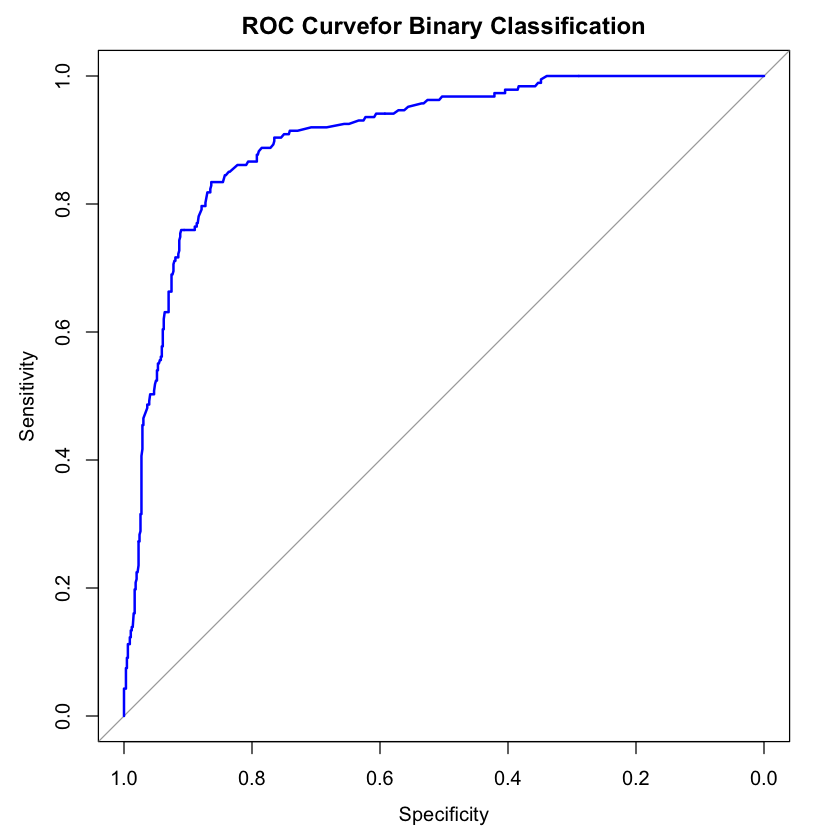

In [53]:
#Compute AUC (Area under the Curve)
library(pROC)
roc_curve <- roc(test_dataLogR$hs_categLogR, test_dataLogR$predicted_prob)


#Plot ROC Curve
plot(roc_curve, main = "ROC Curvefor Binary Classification", col = "blue")

#Print AUC value
auc(roc_curve)

XGBOOST MODEL TRAINING - FOR IMPROVED MODEL PERFORMANCE 

In [54]:
#Checking data format compatibility 

str(FramData_df)


'data.frame':	4240 obs. of  23 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : num  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : num  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : num  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : num  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...
 $ hbpRisk        : num  0 1 1 2 1 2 1 0 1 2 ...
 $ BMI_category   : num  1 1 1 1 0 2 2 0 1 0 ...
 $ hs

In [55]:
#Creating a copy of my data frame to train the XGBoost model
FramData_dfXGB <- FramData_df
FramData_dfXGB <- as.data.frame(FramData_dfXGB) # Ensures full copy

In [64]:
#Further Modifying the Target/Outcome variable of hs_category (heart stress category) to include a column with 
#a binary outcome in order to train a Gradient Boost model on 

FramData_dfXGB <- FramData_dfXGB %>%
mutate(
    hs_categXGB = case_when(
        hs_index < 60 ~ 0, #Low stress
        hs_index >= 60 ~1 #High stress
        )
    )

#Check first few rows
head(FramData_dfXGB)


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,⋯,hbpRisk,hs_index,ageRisk,cholRisk,smokeRisk,education,hs_category,BMI_category,hs_categLogR,hs_categXGB
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,39,0,0,0,0,0,0,195,106.0,⋯,0,47.80,0,0,0,4,1,1,0,0
2,0,46,0,0,0,0,0,0,250,121.0,⋯,1,55.30,1,1,0,2,1,1,0,0
3,1,48,1,20,0,0,0,0,245,127.5,⋯,1,53.55,1,1,2,1,1,1,0,0
4,0,61,1,30,0,0,1,0,225,150.0,⋯,2,58.30,2,1,2,3,1,1,0,0
5,0,46,1,23,0,0,0,0,285,130.0,⋯,1,56.30,1,1,2,3,1,0,0,0
6,0,43,0,0,0,0,1,0,228,180.0,⋯,2,69.40,1,1,0,2,2,2,1,1


In [76]:
str(FramData_dfXGB)

'data.frame':	4240 obs. of  25 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : num  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : num  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : num  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...
 $ hbpRisk        : num  0 1 1 2 1 2 1 0 1 2 ...
 $ hs_index       : num  47.8 55.3 53.5 58.3 56.3 ...
 $ ageRisk        : num  0 1 1 2 1 1 2 1 1 1 ...


In [77]:
#Selection of same columns to train XGBoost as for Log Regression Model

FramData_dfs <- c("male", "education", "prevalentStroke", "TenYearCHD", "hbpRisk", "BMI_category", "cholRisk",
                  "smokeRisk", "ageRisk", "hs_categXGB")

#Create new dataframe with selected columns
FramData_dfXGBN <- FramData_dfXGB[, FramData_dfs]
 

#View new dataframe
head(FramData_dfXGBN)

                  

,male,education,prevalentStroke,TenYearCHD,hbpRisk,BMI_category,cholRisk,smokeRisk,ageRisk,hs_categXGB
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4,0,0,0,1,0,0,0,0
2,0,2,0,0,1,1,1,0,1,0
3,1,1,0,0,1,1,1,2,1,0
4,0,3,0,1,2,1,1,2,2,0
5,0,3,0,0,1,0,1,2,1,0
6,0,2,0,0,2,2,1,0,1,1


In [81]:
#Converting multiple columns to numeric for XGBoost Model training 

FramData_dfXGBN[, c("male", "prevalentStroke", "TenYearCHD", "hbpRisk", "cholRisk", "smokeRisk", "ageRisk")] <- lapply(FramData_dfXGBN[, c("male", "prevalentStroke", "TenYearCHD", "hbpRisk", "cholRisk", "smokeRisk", "ageRisk")], as.numeric)

                                                                                                                       

In [87]:
#One-hot encoding of specific features for use wit XGBoost 

dummies <- dummyVars(~ education + hs_categXGB + BMI_category, data = FramData_dfXGBN)

#Apply the transformation to create one-hot encoded variables
df_encoded <- predict(dummies, newdata = FramData_dfXGBN)

#Convert to a data frame
df_encoded <- as.data.frame(df_encoded)

#Combine the encoded variable with the original dataset, excluding the original categorical columns
FramData_dfXGBN <- cbind(FramData_dfXGBN[, !names(FramData_dfXGBN) %in%c("education", "hs_categXGB", "BMI_category")], df_encoded)


In [90]:
head(FramData_dfXGBN)

,male,prevalentStroke,TenYearCHD,hbpRisk,cholRisk,smokeRisk,ageRisk,education,hs_categXGB,BMI_category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,4,0,1
2,0,0,0,1,1,0,1,2,0,1
3,1,0,0,1,1,2,1,1,0,1
4,0,0,1,2,1,2,2,3,0,1
5,0,0,0,1,1,2,1,3,0,0
6,0,0,0,2,1,0,1,2,1,2


In [91]:
#Split Data for Training & Testing 

set.seed(123) 

#Creating train-test split (80% train, 20% test)
split_index <- createDataPartition(FramData_dfXGBN$hs_categXGB, p = 0.8, list = FALSE)

#Subsetting the data
train_data <- FramData_dfXGBN[split_index, ]
test_data <- FramData_dfXGBN[-split_index, ]

#Checking dimensions of the split
dim(train_data) #should be 80% of the data
dim(test_data) #should be 20% of the data


[1] 3392   10

[1] 848  10

In [59]:
library(xgboost)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [92]:
str(train_data)
str(test_data)

'data.frame':	3392 obs. of  10 variables:
 $ male           : num  1 0 1 0 0 0 0 1 1 0 ...
 $ prevalentStroke: num  0 0 0 0 0 0 0 0 0 0 ...
 $ TenYearCHD     : num  0 0 0 1 0 1 0 0 0 0 ...
 $ hbpRisk        : num  0 1 1 2 1 1 0 1 2 1 ...
 $ cholRisk       : num  0 1 1 1 1 1 2 1 1 1 ...
 $ smokeRisk      : num  0 0 2 2 2 0 2 0 2 0 ...
 $ ageRisk        : num  0 1 1 2 1 2 1 1 1 1 ...
 $ education      : num  4 2 1 3 3 1 2 1 1 1 ...
 $ hs_categXGB    : num  0 0 0 0 0 0 0 0 1 0 ...
 $ BMI_category   : num  1 1 1 1 0 2 0 1 0 0 ...
'data.frame':	848 obs. of  10 variables:
 $ male           : num  0 0 0 0 1 0 0 1 1 0 ...
 $ prevalentStroke: num  0 0 0 0 0 0 0 0 0 0 ...
 $ TenYearCHD     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hbpRisk        : num  2 1 1 2 1 1 0 1 1 1 ...
 $ cholRisk       : num  1 2 0 1 0 1 1 1 1 1 ...
 $ smokeRisk      : num  0 0 0 0 2 2 2 1 2 0 ...
 $ ageRisk        : num  1 1 1 2 0 1 1 1 1 2 ...
 $ education      : num  2 3 1 1 3 2 1 1 4 1 ...
 $ hs_categXGB    : num  1 0 0 1 0 

In [94]:
#Data conversion into XGBoost Matrix Format

train_matrix <- xgb.DMatrix(data = as.matrix(train_data[, -which(names(train_data) == "hs_categXGB")]),
                            label = as.numeric(train_data$hs_categXGB)
                            )

test_matrix <- xgb.DMatrix(data = as.matrix(test_data[, -which(names(test_data) == "hs_categXGB")]),
                           label = as.numeric(test_data$hs_categXGB)
                           )

In [95]:
#Setting XGBoost model Parameters

params <- list(
    objective = "binary:logistic", #For binary classification
    eval_metric = "auc", #Use AUC as evaluation metric
    eta = 0.1, #Learning Rate
    max_depth = 6, #Tree depth
    subsample = 0.8, #Subsampling ratio
    colsample_bytree = 0.8  #Feature sampling ratio
    )


In [96]:
#Training the XGBoost Model

xgb_model <- xgb.train(
    params = params, 
    data = train_matrix,
    nrounds = 100,  #number of boosting rounds
    watchlist = list(train = train_matrix, test = test_matrix),
    early_stopping_rounds = 10,  #stop if no improvement after 10 rounds
    verbose = 1    #print progress
    )

[1]	train-auc:0.899835	test-auc:0.892053 
Multiple eval metrics are present. Will use test_auc for early stopping.
Will train until test_auc hasn't improved in 10 rounds.

[2]	train-auc:0.901261	test-auc:0.894853 
[3]	train-auc:0.907291	test-auc:0.898257 
[4]	train-auc:0.909855	test-auc:0.902452 
[5]	train-auc:0.912526	test-auc:0.902657 
[6]	train-auc:0.911070	test-auc:0.898904 
[7]	train-auc:0.912729	test-auc:0.898077 
[8]	train-auc:0.911961	test-auc:0.897586 
[9]	train-auc:0.913069	test-auc:0.898462 
[10]	train-auc:0.915180	test-auc:0.898397 
[11]	train-auc:0.914391	test-auc:0.898114 
[12]	train-auc:0.913175	test-auc:0.896698 
[13]	train-auc:0.915092	test-auc:0.898356 
[14]	train-auc:0.916364	test-auc:0.898847 
[15]	train-auc:0.918222	test-auc:0.899759 
Stopping. Best iteration:
[5]	train-auc:0.912526	test-auc:0.902657



In [97]:
#Predict probabilities on test set
test_predictions <- predict(xgb_model, test_matrix)

In [98]:
#Convert probabilities to Binary Classes 0 or 1

test_pred_labels <- ifelse(test_predictions > 0.5, 1, 0)

In [100]:
#EVALUATE MODEL PERFORMANCE 

auc_value <- roc(test_data$hs_categXGB, test_predictions)$auc
print(paste("AUC:", auc_value))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.90265682294395"


In [102]:
#Confusion Matrix

#Converting true labels and predictions to factors
true_labelsXGB <- factor(test_data$hs_categXGB, levels = c(0,1))
predicted_labels <- factor(ifelse(test_predictions > 0.5, 1, 0), levels = c(0, 1))

#Print confusion matrix
conf_matrixXGB <- confusionMatrix(predicted_labels, true_labelsXGB)
print(conf_matrixXGB)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 608  42
         1  56 142
                                         
               Accuracy : 0.8844         
                 95% CI : (0.861, 0.9052)
    No Information Rate : 0.783          
    P-Value [Acc > NIR] : 1.113e-14      
                                         
                  Kappa : 0.669          
                                         
 Mcnemar's Test P-Value : 0.1891         
                                         
            Sensitivity : 0.9157         
            Specificity : 0.7717         
         Pos Pred Value : 0.9354         
         Neg Pred Value : 0.7172         
             Prevalence : 0.7830         
         Detection Rate : 0.7170         
   Detection Prevalence : 0.7665         
      Balanced Accuracy : 0.8437         
                                         
       'Positive' Class : 0              
                                         


EXPLANATION OF RESULTS 

CONFUSION MATRIX
Table above shows how well the model predicts class 0 and 1:- 

- 608 (True Negatives). The model correctly predicted 0 when the actual class was 0
- 42 (False Negatives). The model predicted 0 but the actual class was 1
- 56 (False Positives). The model predicted 1 but the actual class was 0
- 142 (True Positives). THe model correctly predicted 1 when the actual class was 1

KEY PERFORMANCE METRICS 
- Accuracy (0.8844) i.e. 88.44%
- 95% Confidence Interval (0.861, 0.9052) is the range in which the true accuracy of the model is expected to fall 95% of the time
- P-Value (1.113e-14) is the probability that the model's accuracy is no better than the No Information Rate. Since it's very small, the model is significantly better.
- Kappa - measures agreement between predicted and actual classification, adjusted for chance (range from -1 i.e. complete disagreement to 1 i.e. perfect agreement). 0.669 suggestive of substantial agreement.
- Sensitivity of 91.57% suggests the model correctly identifies Class 0 (True Negative) very well
- Specificity shows how well the model correctly identifies Class 1 (True Positive). At 77.17%, it does not perform as well as it does on identifying Class 0.
- PPV of 93.54% (Precision for Class 0) i.e. if the model predicts 0, it is correct 93.54% of the time
- NPV of 71.72% (Precision for Class 1) i.e. if the model predicts 1, it is only correct 71.72% of the time

COMPARISON OF XGBOOST MODEL OUTPUTS WITH LOG REGRESSION MODEL OUTPUTS

Similar results were obtained for both models, with XGBoost model performing slightly better on SENSITIVITY AND PPV but slightly worse than the log regression model on SPECIFICITY AND NPV values. 

This was surprising given that XGBoost is a non-linear model and very much more powerful than logistic regression in identifying non-linear relationships.

Further techniques to improve on the performance of the XGBoost model include: - 

1. Hyperparameter tuning
2. Increasing data size and quality
3. Further Feature Engineering
4. Use of Cross validation to evaluate performance in a robust manner 

In [105]:
#Plot ROC Curve

roc_obj <- roc(test_pred_labels, test_predictions)  #test_labels is the binary outcome

#Dataframe for ggplot with TPR and FPR
roc_data <- data.frame(
    TPR = rev(roc_obj$sensitivities),  #True Positive Rate
    FPR = rev(1 - roc_obj$sensitivities)  #False Positive Rate
)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



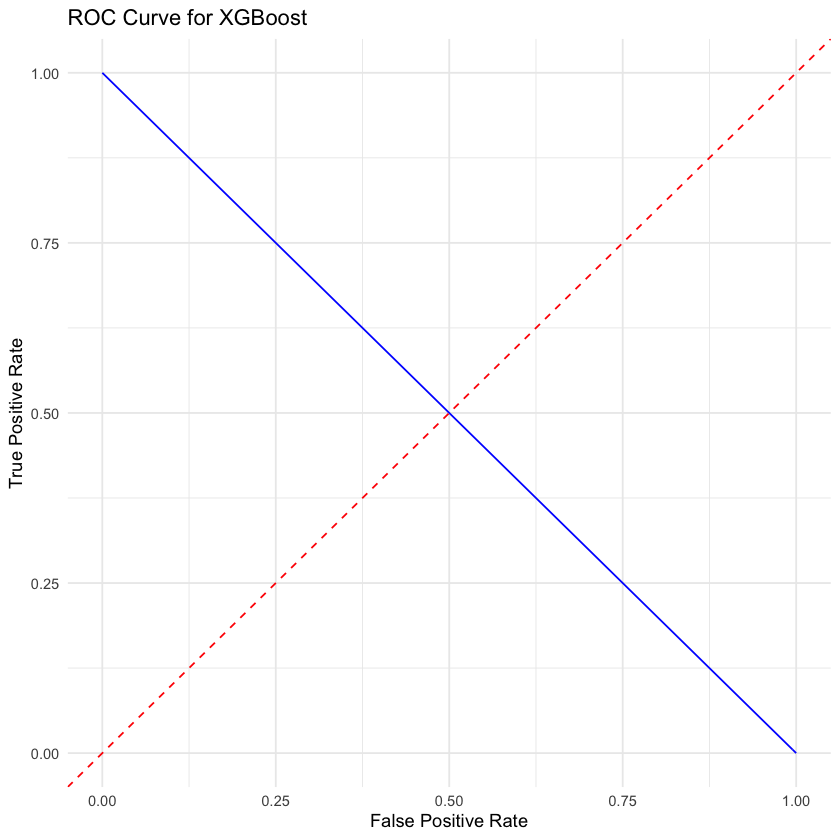

In [108]:
#Plotting ROC curve for XGBoost Model outputs

ggplot(roc_data, aes(x = FPR, y = TPR)) + 
    geom_line(color = "blue") + 
    geom_abline(linetype = "dashed", color = "red") +
    labs(title = "ROC Curve for XGBoost", x = "False Positive Rate", y = "True Positive Rate") +
    theme_minimal()